# packages

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # suppress warnings

# shap package import

In [1]:
# ! conda install -c conda-forge shap # better using the terminal, it didn't work from here

^C


In [3]:
import shap

# Data Preparation

In [4]:
path_bm = 'c:\\datasets\\kaggle\\BigMartSales\\datasets_12276_16823_Train_UWu5bXk.csv'

In [30]:
BigMart = pd.read_csv(path_bm)

In [31]:
BigMart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
BigMart.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [33]:
missing_val_count_by_column = (BigMart.isnull().sum())
print("overall ", len(missing_val_count_by_column[missing_val_count_by_column > 0]) , 
      "variables with missing values" , "\nin details:","\n" , 
      missing_val_count_by_column[missing_val_count_by_column > 0])

overall  2 variables with missing values 
in details: 
 Item_Weight    1463
Outlet_Size    2410
dtype: int64


#### Item_Weight is numerical - can be used median but , Outlet size is categorical: Unknown

In [34]:
print(BigMart[BigMart.Item_Weight.isnull()].groupby('Item_Type')['Item_Identifier'].count())
print(BigMart[BigMart.Item_Weight.notnull()].groupby('Item_Type')[['Item_Weight']].median())
tofill = BigMart[BigMart.Item_Weight.notnull()].groupby('Item_Type')[['Item_Weight']].median().reset_index()

Item_Type
Baking Goods             112
Breads                    47
Breakfast                 21
Canned                   110
Dairy                    116
Frozen Foods             138
Fruits and Vegetables    213
Hard Drinks               31
Health and Hygiene        90
Household                151
Meat                      88
Others                    32
Seafood                   13
Snack Foods              212
Soft Drinks               71
Starchy Foods             18
Name: Item_Identifier, dtype: int64
                       Item_Weight
Item_Type                         
Baking Goods                11.650
Breads                      10.600
Breakfast                   10.695
Canned                      12.150
Dairy                       13.350
Frozen Foods                12.850
Fruits and Vegetables       13.100
Hard Drinks                 10.100
Health and Hygiene          12.150
Household                   13.150
Meat                        12.350
Others                      14.500


In [35]:
tofill

,Item_Type,Item_Weight
0,Baking Goods,11.650
1,Breads,10.600
2,Breakfast,10.695
3,Canned,12.150
4,Dairy,13.350
5,Frozen Foods,12.850
6,Fruits and Vegetables,13.100
7,Hard Drinks,10.100
8,Health and Hygiene,12.150
9,Household,13.150


In [36]:
# temporary column with the medians
BigMart = BigMart.merge(tofill, how='inner',left_on='Item_Type', right_on='Item_Type',
                         suffixes=('', '_right'))
# fill nas with median by Item_Type
BigMart['Item_Weight'] = BigMart.apply(lambda row: row['Item_Weight_right'] if np.isnan(row['Item_Weight']) else row['Item_Weight'],axis=1)

In [37]:
BigMart.drop(['Item_Weight_right'], axis=1)
BigMart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_right
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,13.35
1,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530,13.35
2,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224,13.35
3,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,13.35
4,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868,13.35


In [39]:
# imputing missing values in Item_Weight by median and Outlet_Size with mode
BigMart['Outlet_Size']=BigMart['Outlet_Size'].fillna('Unknown')

In [41]:
BigMart['Outlet_Size'].unique()

array(['Medium', 'Small', 'Unknown', 'High'], dtype=object)

In [42]:
missing_val_count_by_column = (BigMart.isnull().sum())
print("overall ", len(missing_val_count_by_column[missing_val_count_by_column > 0]) , 
      "variables with missing values" , "\nin details:","\n" , 
      missing_val_count_by_column[missing_val_count_by_column > 0])

overall  0 variables with missing values 
in details: 
 Series([], dtype: int64)


# Feature engeenering

In [44]:
# creating a broad category of type of Items
BigMart['Item_Type_Combined'] = BigMart['Item_Identifier'].apply(lambda x: x[0:2])
BigMart['Item_Type_Combined'] = BigMart['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

print(BigMart['Item_Type_Combined'].value_counts())

# operating years of the store
BigMart['Outlet_Years'] = 2013 - BigMart['Outlet_Establishment_Year']

# modifying categories of Item_Fat_Content
BigMart['Item_Fat_Content'] = BigMart['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
print(BigMart['Item_Fat_Content'].value_counts())

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [46]:
# label encoding the ordinal variables
le = LabelEncoder()
BigMart['Outlet'] = le.fit_transform(BigMart['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    BigMart[i] = le.fit_transform(BigMart[i])

# one hot encoding the remaining categorical variables 
BigMart = pd.get_dummies(BigMart, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [47]:
BigMart.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_right,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,13.35,14,...,0,0,0,0,0,0,0,0,0,1
1,FDA03,18.500,0.045464,Dairy,144.1102,OUT046,1997,2187.1530,13.35,16,...,0,0,0,0,0,0,0,0,1,0
2,FDU02,13.350,0.102492,Dairy,230.5352,OUT035,2004,2748.4224,13.35,9,...,0,0,0,0,0,0,1,0,0,0
3,FDE51,5.925,0.161467,Dairy,45.5086,OUT010,1998,178.4344,13.35,15,...,1,0,0,0,0,0,0,0,0,0
4,FDV38,19.250,0.170349,Dairy,55.7956,OUT010,1998,163.7868,13.35,15,...,1,0,0,0,0,0,0,0,0,0


# Training Test Split

In [48]:
# dropping the ID variables and variables that have been used to extract new variables
BigMart.drop(['Item_Type','Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'],axis=1,inplace=True)

# separating the dependent and independent variables
X = BigMart.drop('Item_Outlet_Sales',1)
y = BigMart['Item_Outlet_Sales']

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# SHAP initialization

In [49]:
# Need to load JS vis in the notebook
shap.initjs()

# Models to use

In [50]:
xgb_model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001, random_state=0)
xgb_model.fit(X_train, y_train)

[16:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [51]:
y_predict = xgb_model.predict(X_test)

# Evaluation

In [52]:
mean_squared_error(y_test, y_predict)**(0.5)

1486.3696791551038

# Interpret models

### Local Interpretation using SHAP (for prediction at id number 4776)
#### It takes for a while :(

In [56]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)
i = 4776
shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[4776], 
                feature_names=X_train.columns)

### Global Interpretation using Shapley values

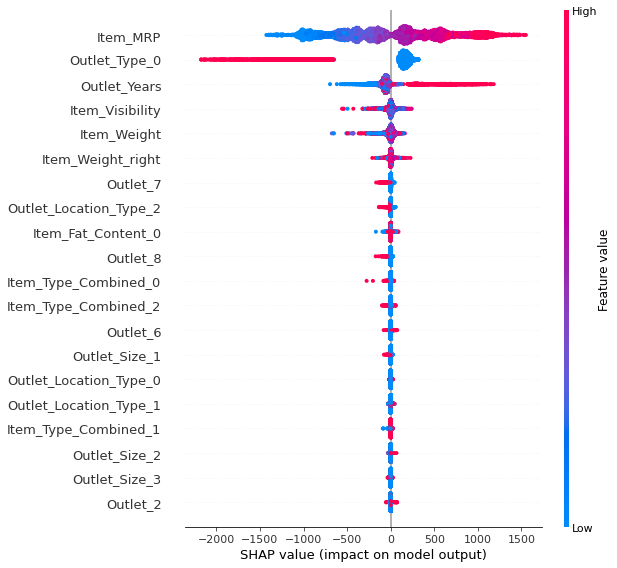

In [57]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

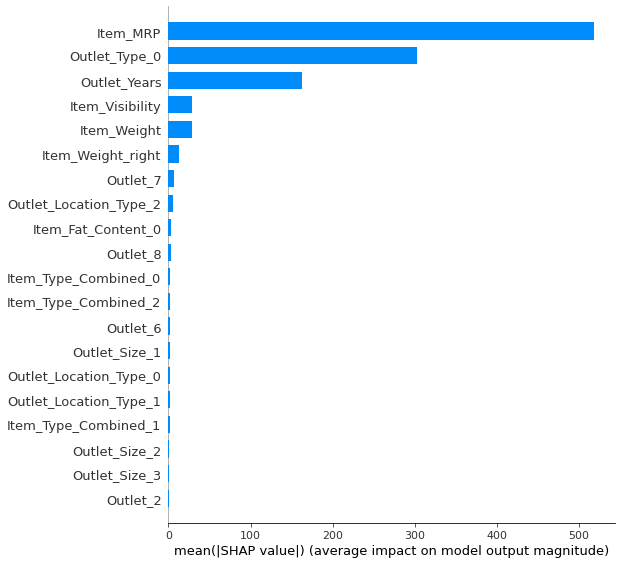

In [58]:
shap.summary_plot(shap_values, X_train, plot_type="bar")
plt.show()

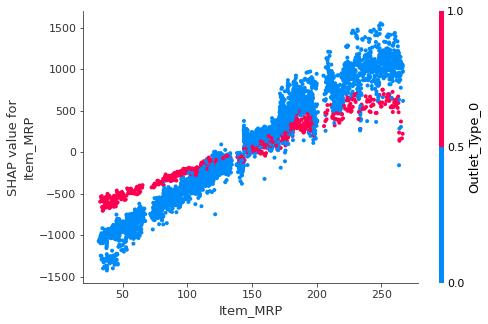

In [60]:
shap.dependence_plot('Item_MRP', shap_values, X_train)
# The function automatically includes another variable that your chosen variable interacts most with

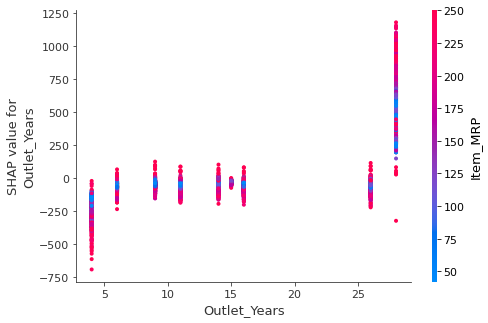

In [61]:
shap.dependence_plot('Outlet_Years', shap_values, X_train)

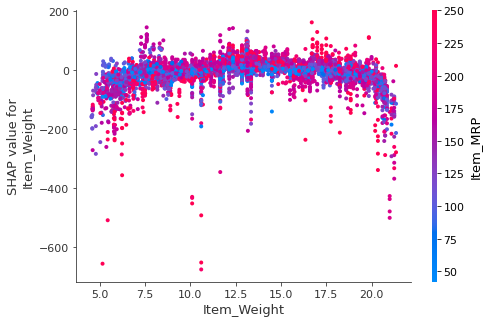

In [62]:
shap.dependence_plot('Item_Weight', shap_values, X_train)